# Credit Card Customer Segmentation

## Introduction

In this project we will be working for a credit card company who have requested that their customer base be segmented in order to apply more targeted business strategies to each group.

The data for this project has already been cleaned by the data engineering team, allowing this project to focus on building and implementing a model. During a meeting with the Data Science coordinator it was decided that a K-Means algorithm would be used to find clusters amongst the data. This type of unsupervised machine learning method is perfect for this type of project.

The steps are as follows:
- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

Below is the data dictionary for the dataset we will be using:

|Feature name|Description|
|----|----|
|`customer_id` | unique identifier for each customer.|
|`age` | customer age in years.|
|`gender` | customer gender (M or F). |
|`dependent_count`| number of dependents of each customer.|
|`education_level`| level of education ("High School", "Graduate", etc.).|
|`marital_status`| marital status ("Single", "Married", etc.).
|`estimated_income`| the estimated income for the customer projected by the data science team.|
|`months_on_book`| time as a customer in months.|
|`total_relationship_count`| number of times the customer contacted the company.|
|`months_inactive_12_mon`| number of months the customer did not use the credit card in the last 12 months.|
|`credit_limit`| customer's credit limit.|
|`total_trans_amount`| the overall amount of money spent on the card by the customer.|
|`total_trans_count`| the overall number of times the customer used the card.|
|`avg_utilization_ratio`| daily average utilization ratio.|

## Initial Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('customer_segmentation.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [2]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [3]:
df['education_level'].value_counts()

Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

In [4]:
df['marital_status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

## Feature Engineering

Most of our data is numerical, with three exceptions. 

`gender` is categorical but can be converted to a binary categorisation:
- `M` to 1 and 
- `F` to 0

`education_level` is categorical but could also be ranked numerically by level:
- `Uneducated` as `0`
- `High School` as `1` 
- `College` as `2`
- `Graduate` as `3`      
- `Post-Graduate` as `4`     
- `Doctorate` as `5`

In [5]:
df['gender'] = np.where(df['gender'] == 'M', 1, 0)

df['education_level'] = df['education_level'].map({
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
})

df.head(20)

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000
5,713061558,44,1,2,3,Married,54000,36,3,1,4010.0,1088,24,0.311
6,810347208,51,1,4,1,Married,166000,46,6,1,34516.0,1330,31,0.066
7,818906208,32,1,0,1,Unknown,66000,27,2,2,29081.0,1538,36,0.048
8,710930508,37,1,3,0,Single,77000,36,5,2,22352.0,1350,24,0.113
9,719661558,48,1,2,3,Single,87000,36,6,3,11656.0,1441,32,0.144


Now that we have transformed our first two categorical columns in to logical numerical columns we must deal with the `marital_status` column. Unlike `education_level` there is no magnitude between the different labels, therefore we will need to create dummy variables with binary labels.

In [6]:
df = pd.get_dummies(data=df, 
                    columns=["marital_status"])

df.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


## Scaling the Data
The next step is to transform the data so that it is on the same scale (features with values in different orders of magnitude will make it more difficult to evaluate.

In [7]:
df_mod = df.drop(['customer_id'], axis=1).copy()
df_mod.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


In [8]:
scaler = StandardScaler()
scaler.fit(df_mod)
df_scaled = scaler.transform(df_mod)

print(df_scaled)

[[-0.16540558  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 [ 0.33357038 -0.9434357   2.04319867 ... -0.92821381  1.2523374
  -0.28260887]
 [ 0.58305837  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 ...
 [-0.29014957 -0.9434357  -1.03646242 ...  1.07733799 -0.79850685
  -0.28260887]
 [-2.03656544  1.05995565 -0.26654715 ... -0.92821381 -0.79850685
   3.53845931]
 [-0.41489356 -0.9434357  -0.26654715 ...  1.07733799 -0.79850685
  -0.28260887]]


In [9]:
scaled_customers = pd.DataFrame(df_scaled)

## Choosing K

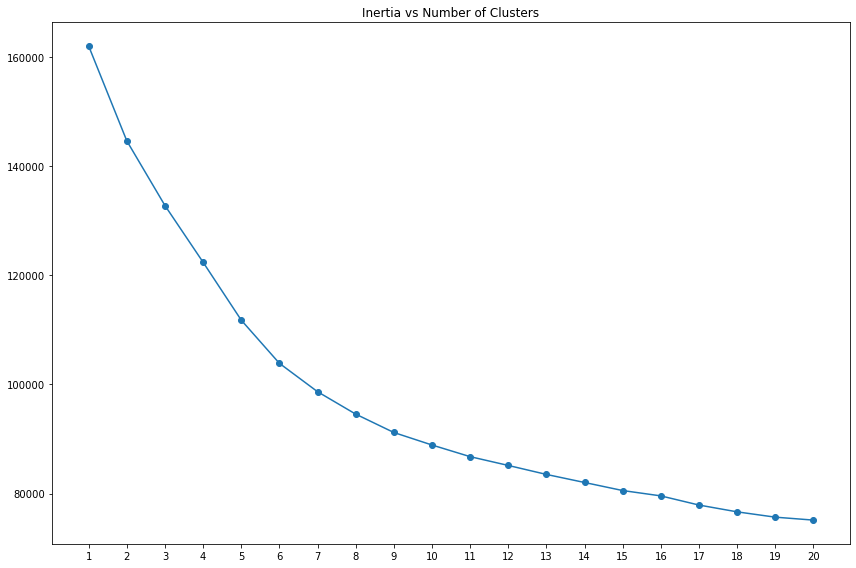

In [10]:
inertias = []
for k in range(1, 21):
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(scaled_customers)
    inertias.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), inertias, marker='o')
plt.xticks(ticks=range(1, 21), labels=range(1, 21))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

There is not a clear 'elbow' in the above graph, however it does look as though the difference starts to reduce more after k=6. 

In [11]:
# Re-run the model with chosen k value
model = KMeans(n_clusters=6)
clusters = model.fit_predict(scaled_customers)

# Adding cluster designations to our dataframe
df['CLUSTER'] = clusters + 1
print(df['CLUSTER'].value_counts())
print(f"Inertia = {model.inertia_:.0f}")

2    2824
6    2788
4    1610
5    1411
1     748
3     746
Name: CLUSTER, dtype: int64
Inertia = 106434


## Analyzing Results

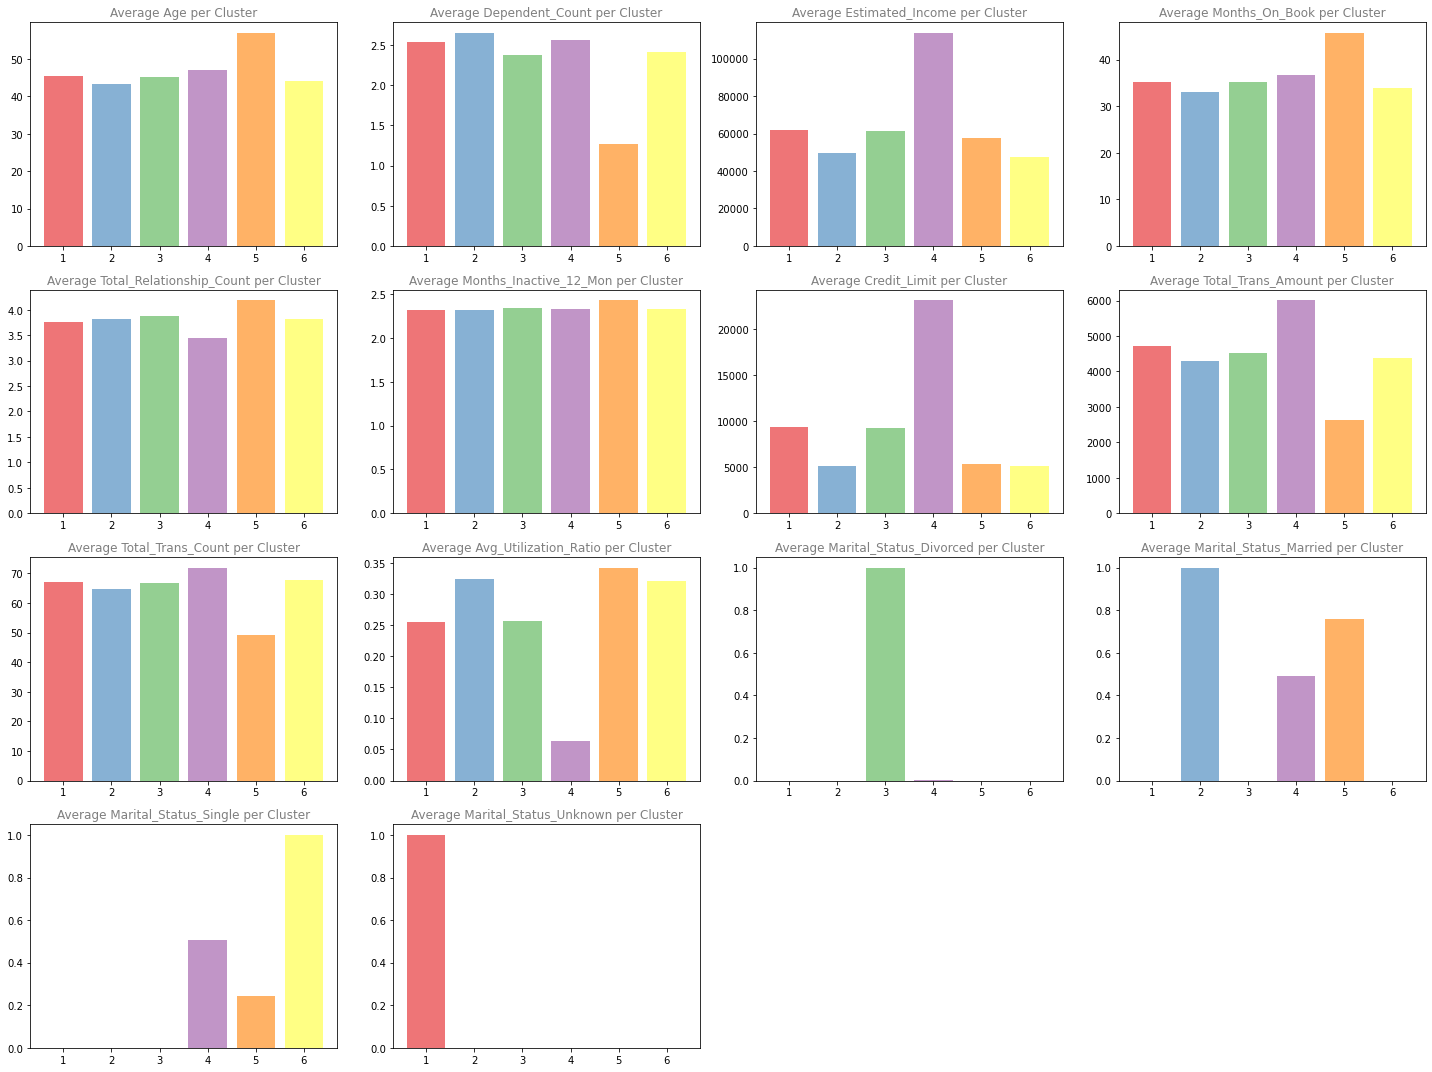

In [19]:
features = df.columns.drop(["customer_id", "CLUSTER"])
categorical_columns =["gender", "education_level"]
numerical_columns = features.drop(categorical_columns)

fig = plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(4, 4, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

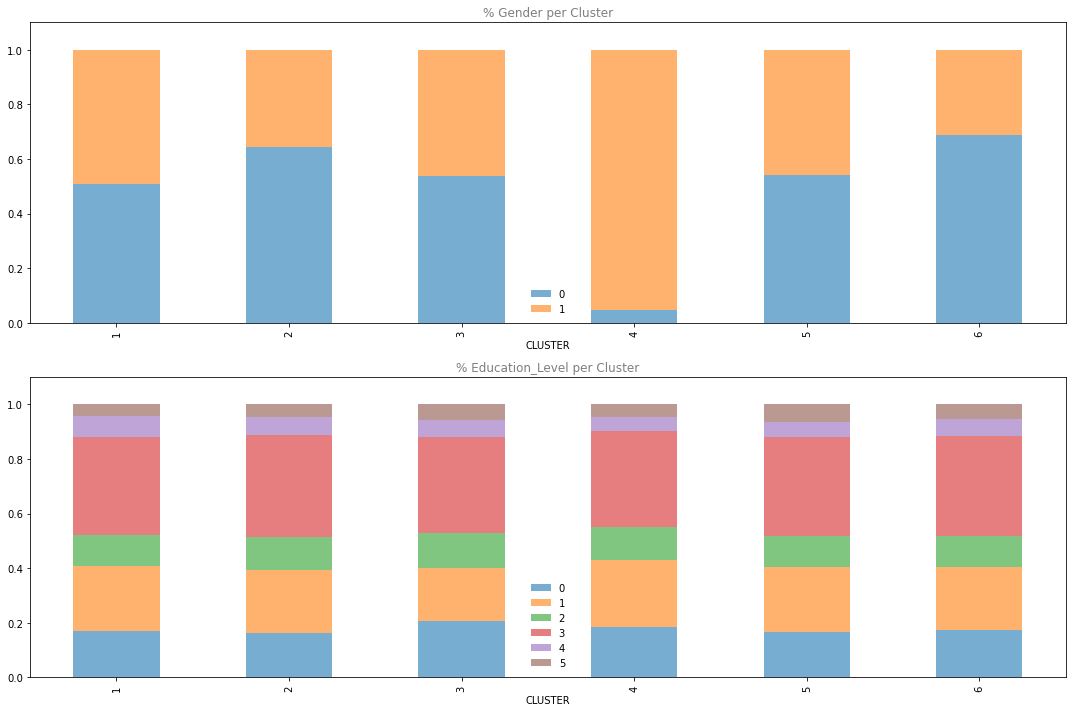

In [20]:
fig = plt.figure(figsize=(15,10 ))
for i, column in enumerate(categorical_columns):
    plot_df = pd.crosstab(
        index=df['CLUSTER'], columns=df[column],
        values=df[column], aggfunc='size', normalize='index'
    )
    ax = fig.add_subplot(2, 1, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {column.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.1)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

In [14]:
features.drop(categorical_columns)

Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown'],
      dtype='object')

Main characteristics of each cluster:

- Cluster 1 - has a fairly even split by gender, its clearest feature is unknown marital status.
- Cluster 2 - features one of the lowest average estimated income, one of the lowest average credit limits, and consists only of married customers.
- Cluster 3 - has a fairly even split by gender, it consists solely of divorced customers.
- Cluster 4 - consists mostly of males, features the highest in average estimated income,  total transaction amounts, total transaction counts and credit limits.
- Cluster 5 - these are the oldest customers on average, with the most months on the books. They are mostly married and feature lowest estimated incomes and transaction counts.
- Cluster 6 is our only one with a higher percentage of females, they are all single and have a lower credit limit.


TO BE COMPLETED MORE